In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from particle_xdepths import DefaultXdepthGetter
from cascade_driver import CascadeDriver
from hadron_inter import HadronInteraction

hadron_interactions = HadronInteraction()


In [ ]:
xdepth_getter = DefaultXdepthGetter(30)

In [ ]:
cas_driver = CascadeDriver(xdepth_getter = xdepth_getter,
                           threshold_energy = 1e-6,
                           hadron_interactions = hadron_interactions, 
                           mceq_decaying_pdgs=[],
                           height = 5)

In [ ]:
%autoreload 2

cas_driver.start_accumulate()
# cas_driver.stop_accumulate()
cas_driver.run(pdg = 2212, energy = 1e2, 
                mceq_decaying_pdgs = [-11, 11, -12, 12, -13, 13, -14, 14, 16, 22,
                                        111, 130, -211, 211, 310,
                                       -321, 321, -2112, 2112, 
                                       -2212, 2212, -3122, 3122],
                # mceq_decaying_pdgs = [111, -211, 211, -13, 13],
                threshold_energy = 0)

for i in range(10000):
    try:
        cas_driver.run(pdg = 2212, energy = 1e2, 
                    # mceq_decaying_pdgs = [111, -211, 211, -13, 13],
                    # mceq_decaying_pdgs = [],
                    # threshold_energy = 1e-1
                    )
    except Exception as ex:
        print(ex)
        raise
        
    
cas_driver.stop_accumulate()    

In [ ]:
from cascade_analysis import CascadeAnalysis

cascade_analysis = CascadeAnalysis(cas_driver)
cascade_analysis.print_stats()

{22: 246531, 14: 178940, -14: 175933, -11: 80106, 12: 78602, 11: 77845, -12: 76340, 2212: 57490, 2112: 57240, -13: 26412, 13: 23405, -2212: 1329, -2112: 1306, -211: 1278, 211: 1146, 130: 23, 321: 11, -321: 4, 3122: 1}


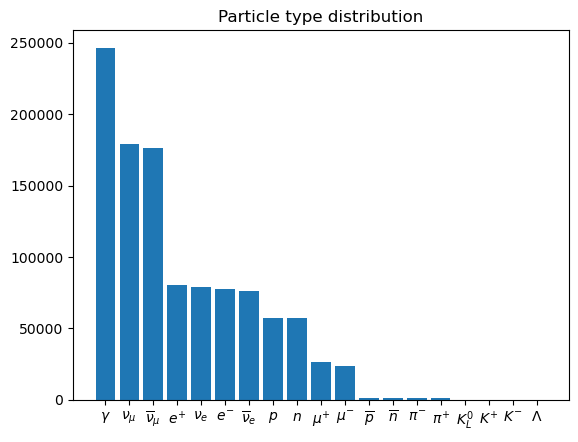

In [74]:
cascade_analysis.plot_pid(from_ = 0)

In [ ]:
cascade_analysis.plot_energy(-13)

In [ ]:
cascade_analysis.plot_energy_list(pids = [-13, 13, -14, 14, -11, 11])

In [ ]:
from mceq_comparison import GetMCEQDist
import matplotlib.pylab as plt

res_mceq = GetMCEQDist()

Muon mass = 0.1056583745, 0.1056583745


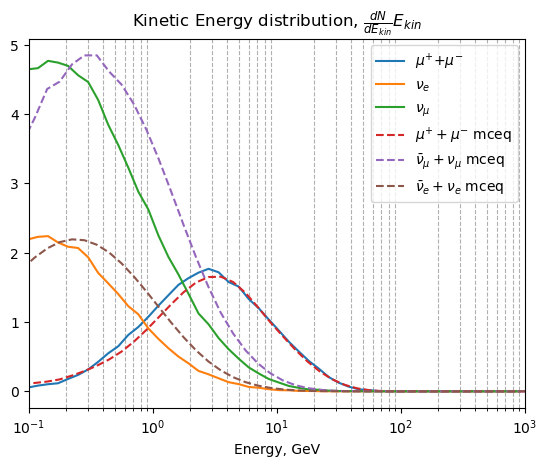

In [78]:
cascade_analysis.plot_energy_kin_dist(pids = [(-13, 13), (12,), (14,)], 
                                      per_run=True,
                                      xrange = (0.9e-1, 1e3),
                                      nbins=50)

plt.semilogx(res_mceq.mu_spec[0], res_mceq.mu_spec[1], label = res_mceq.mu_spec[2], linestyle='--')
plt.semilogx(res_mceq.numu_spec[0], res_mceq.numu_spec[1], label = res_mceq.numu_spec[2], linestyle='--')
plt.semilogx(res_mceq.nue_spec[0], res_mceq.nue_spec[1], label = res_mceq.nue_spec[2], linestyle='--')

plt.xlim(1e-1, 1e3)
plt.grid()
plt.grid(visible=True, which='minor', linestyle='--')
plt.legend()
# plt.ylim(1e-7, 1e3) 

In [ ]:
cascade_analysis.plot_xdepth_list(nbins = 100, pids = [-14, 14, 2212, -13, 13], 
                                  xrange = (0, 1012), per_run = True)

In [ ]:
cascade_analysis.plot_xdepth_stop(nbins = 100, pids = [-14, 14, 2212, -13, 13, 22], #pids = None, 
                                  all_pids = True, 
                                  xrange = (0, 500), per_run = False)

In [ ]:
cascade_analysis.plot_height_list(pids = [22, -13, 13, -11, 11], all_pids=True)

In [ ]:
cascade_analysis.digitize()

In [ ]:
import matplotlib.pylab as plt
plt.semilogx(cascade_analysis.egrid, cascade_analysis.hist_dict[22][0][99])



len(cascade_analysis.hist_dict[22][0])